# CNN 遥感图像分类项目 -  多分类

## 数据说明
This is a 21 class land use image dataset meant for research purposes. 
There are 100 images for each of the following classes:
+ agricultural
+ airplane
+ baseballdiamond
+ beach
+ buildings
+ chaparral
+ denseresidential
+ forest
+ freeway
+ golfcourse
+ harbor
+ intersection
+ mediumresidential
+ mobilehomepark
+ overpass
+ parkinglot
+ river
+ runway
+ sparseresidential
+ storagetanks
+ tenniscourt

Each image measures 256x256 pixels.

The images were manually extracted from large images from the USGS National Map Urban Area Imagery collection for various urban areas around the country. The pixel resolution of this public domain imagery is 1 foot.

Download site: http://weegee.vision.ucmerced.edu/datasets/landuse.html

# 1. 读取原始数据和文件

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from skimage.transform import resize
import cv2

from PIL import Image
import os
from shutil import copyfile

In [2]:
#!pip freeze 

## Load image data

Select 8 categories only for the project to reduce the computation time

In [3]:
category_names = [
    'agricultural',
    'forest',
    'mobilehomepark',
    'overpass',
    'parkinglot',
    'river',
    'runway',
    'sparseresidential'
]

In [4]:
Image_directory = 'data/UCMerced_LandUse/Images'

In [5]:
num_images = 100  # per category
nb_classes = len(category_names)
patch_size = 256  # width and height in pixel
channels = 3

In [6]:
nb_classes

8

In [7]:
# Load the original dataset
images_orig = []
labels_num = []
for i in range(len(category_names)):    
    # load all images per class
    for j in range(num_images):        
        img_path = os.path.join(Image_directory, category_names[i], category_names[i]+'{:02d}.tif'.format(j))
        
        #new_image = plt.imread(img_path) 
        #resized_image = resize(new_image, (patch_size/4, patch_size/4, channels))
        img = Image.open(img_path)
        
        resized_img = img.resize((patch_size//4, patch_size//4), Image.ANTIALIAS)

        arr = np.asarray(resized_img)
        
        images_orig.append(arr)
        labels_num.append([i])

Image Normalization  

In [8]:
images_orig = np.array(images_orig)

print('Image Original Data Type: %s' % images_orig[0].dtype)
print('Original: Min: %.3f, Max: %.3f' % (images_orig.min(), images_orig.max()))
# convert from integers to floats
images_orig = images_orig.astype('float32')
# normalize to the range 0-1
images_orig /= 255.0
# confirm the normalization
print('\nImage Resized Data Type: %s' % images_orig[0].dtype)
print('Resized: Min: %.3f, Max: %.3f' % (images_orig.min(), images_orig.max()))

labels_num = np.array(labels_num)

# Save the numpy datasets
np.save('data/UCMerced_images_orig_MultiClass.npy', images_orig)
np.save('data/UCMerced_labels_num_MultiClass.npy', labels_num)      

Image Original Data Type: uint8
Original: Min: 0.000, Max: 255.000

Image Resized Data Type: float32
Resized: Min: 0.000, Max: 1.000


## Visualize the images



agricultural
(100, 64, 64, 3)


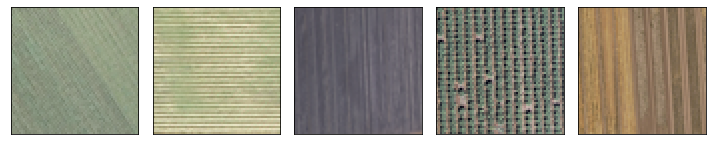

forest
(100, 64, 64, 3)


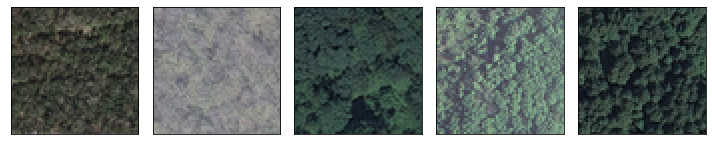

mobilehomepark
(100, 64, 64, 3)


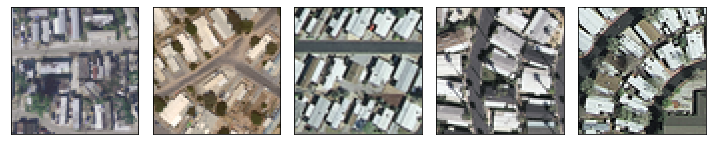

overpass
(100, 64, 64, 3)


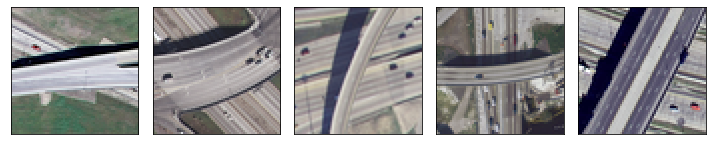

parkinglot
(100, 64, 64, 3)


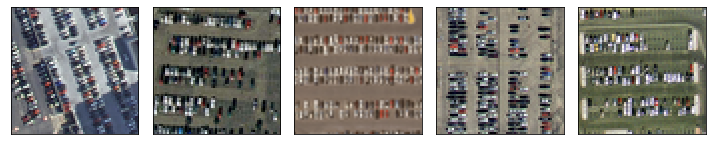

river
(100, 64, 64, 3)


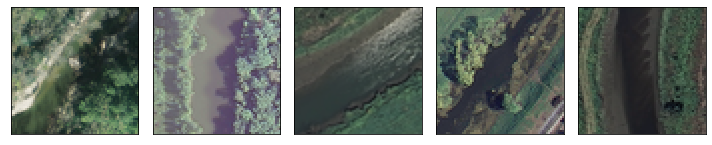

runway
(100, 64, 64, 3)


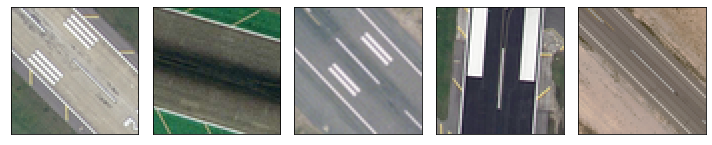

sparseresidential
(100, 64, 64, 3)


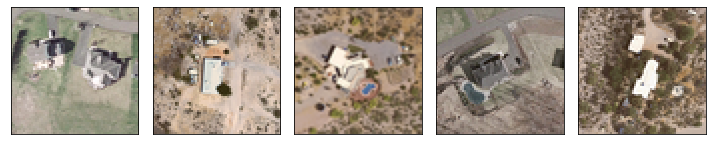

In [9]:
# VISUALIZE IMAGES
def plotImages( images, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.set_xticks(())
        ax.set_yticks(())
    plt.tight_layout()
    plt.show()

# Plot some examples for each category    
def plot_examples_per_category():
    for i in range(nb_classes):
        print(category_names[i])
        images_to_print = images_orig[i*num_images:(i+1)*num_images]
        np.random.seed(2020)
        np.random.shuffle(images_to_print)
        print(images_to_print.shape)
        plotImages(images_to_print)

plot_examples_per_category()